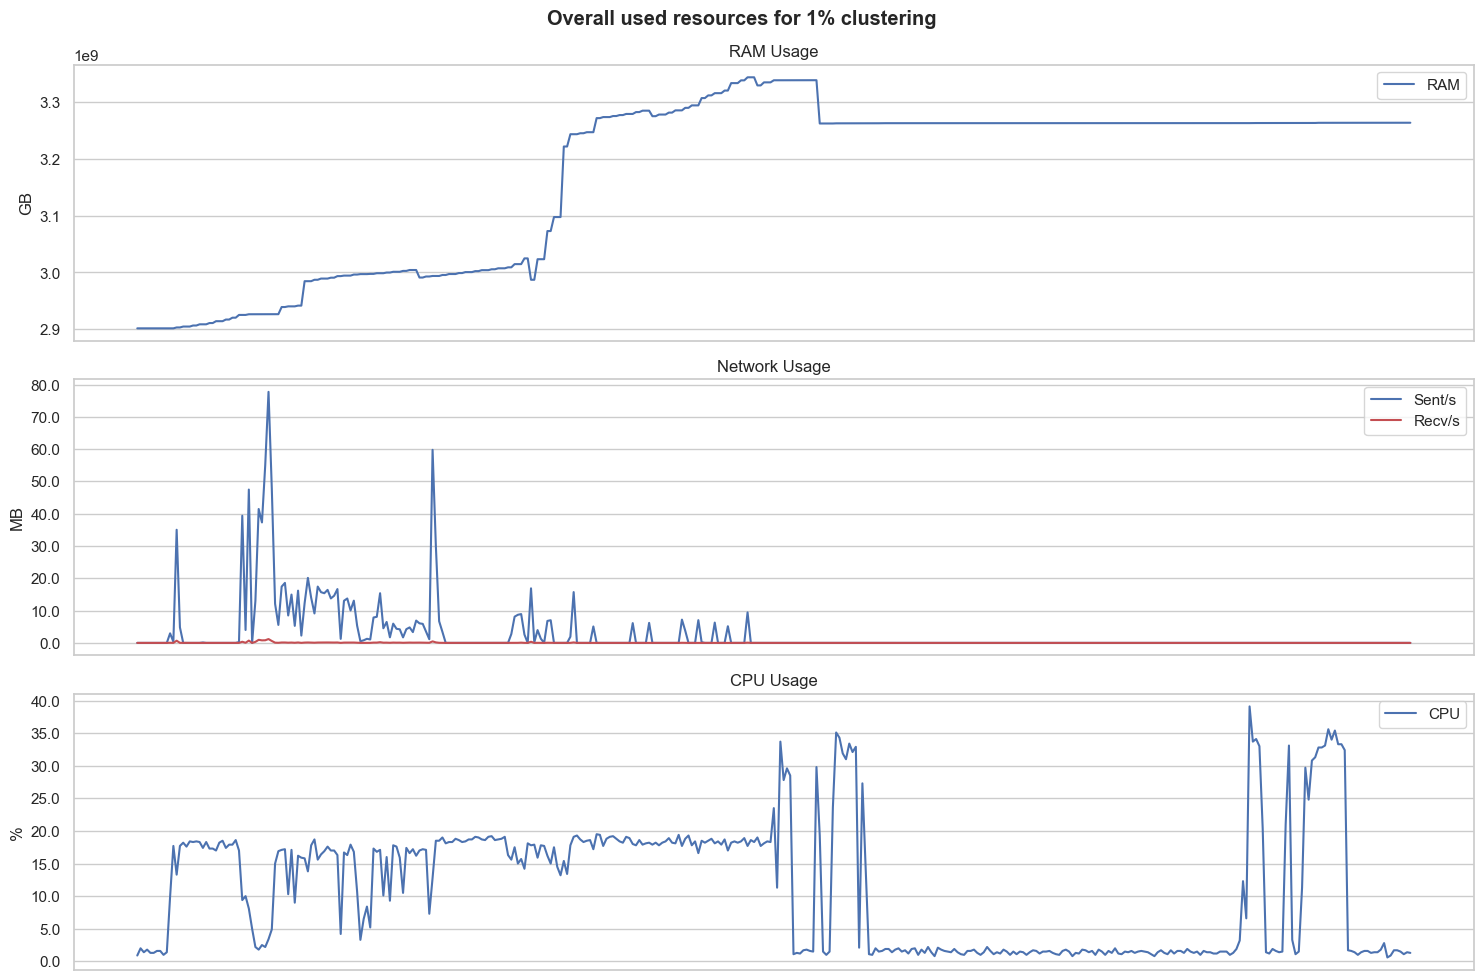

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to convert numbers to MB format
def to_megabytes(x, _):
    return f"{(x / 1e6):.1f}"

# Function to convert to percentage
def to_percent(x, _):
    return f"{(x * 1):.1f}"

# Load CSV file
data = pd.read_csv("1procento.csv", usecols=[
    "timestamp",
    "/.used",
    "br-d9dc76c093c8.bytes_recv_rate_per_sec",
    "br-d9dc76c093c8.bytes_sent_rate_per_sec",
    "user"
])
data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.strftime("%H:%M:%S")

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle("Overall used resources for 1% clustering", fontweight="bold")

# Plot for RAM
sns.lineplot(data=data["/.used"], color="b", label="RAM", ax=axes[0])

axes[0].set_title("RAM Usage")
axes[0].set_ylabel("GB")
axes[0].xaxis.set_visible(False)
axes[0].grid(True)

# Plot for Network
sentdata = data["br-d9dc76c093c8.bytes_sent_rate_per_sec"]
recvdata = data["br-d9dc76c093c8.bytes_recv_rate_per_sec"]

sns.lineplot(data=sentdata, color="b", label="Sent/s", ax=axes[1])
sns.lineplot(data=recvdata, color="r", label="Recv/s", ax=axes[1])

axes[1].set_title("Network Usage")
axes[1].set_ylabel("MB")
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(to_megabytes))
axes[1].xaxis.set_visible(False)
axes[1].grid(True)

# Plot for CPU
cputotal = data["user"]

sns.lineplot(data=cputotal, color="b", label="CPU", ax=axes[2])

axes[2].set_title("CPU Usage")
axes[2].set_ylabel("%")
axes[2].yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))
axes[2].xaxis.set_visible(False)
axes[2].grid(True)

plt.legend()
plt.tight_layout()
plt.show()
